In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("Data/high_diamond_ranked_10min.csv")
data = data.drop('gameId',axis=1)
data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [3]:
data.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

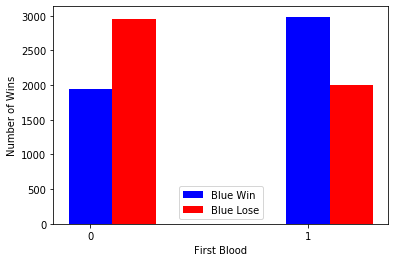

In [4]:
tempData = data[['blueWins','blueFirstBlood','redFirstBlood']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueFirstBlood'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueFirstBlood']).sum().reset_index()

inRedFirst = tempData.set_index(['blueFirstBlood'])
redFirstWin = inRedFirst['redWins'].groupby(['blueFirstBlood']).sum().reset_index()

plt.figure()
plt.bar(blueFirstWin.blueFirstBlood, blueFirstWin.blueWins,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.blueFirstBlood+0.2, redFirstWin.redWins,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('First Blood')
plt.xticks([0,1])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

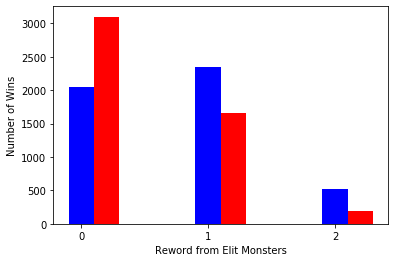

In [5]:
tempData = data[['blueWins','blueEliteMonsters','redEliteMonsters']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueEliteMonsters'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueEliteMonsters']).sum().reset_index()

inRedFirst = tempData.set_index(['blueEliteMonsters'])
redFirstWin = inRedFirst['redWins'].groupby(['blueEliteMonsters']).sum().reset_index()

plt.figure()
plt.bar(blueFirstWin.blueEliteMonsters, blueFirstWin.blueWins,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.blueEliteMonsters+0.2, redFirstWin.redWins,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('Reword from Elit Monsters')
plt.xticks([0,1,2])
plt.ylabel('Number of Wins')
plt.show()

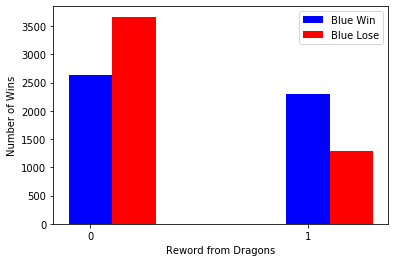

In [6]:
tempData = data[['blueWins','blueDragons','redDragons']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueDragons'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueDragons']).sum().reset_index()

inRedFirst = tempData.set_index(['blueDragons'])
redFirstWin = inRedFirst['redWins'].groupby(['blueDragons']).sum().reset_index()

plt.figure()
plt.bar(blueFirstWin.blueDragons, blueFirstWin.blueWins,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.blueDragons+0.2, redFirstWin.redWins,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('Reword from Dragons')
plt.xticks([0,1])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

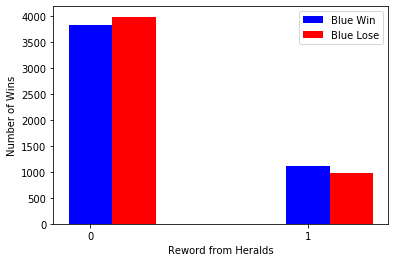

In [7]:
tempData = data[['blueWins','blueHeralds','redHeralds']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueHeralds'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueHeralds']).sum().reset_index()

inRedFirst = tempData.set_index(['redHeralds'])
redFirstWin = inRedFirst['redWins'].groupby(['redHeralds']).sum().reset_index()

plt.figure()
plt.bar(blueFirstWin.blueHeralds, blueFirstWin.blueWins,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.redHeralds+0.2, redFirstWin.redWins,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('Reword from Heralds')
plt.xticks([0,1])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

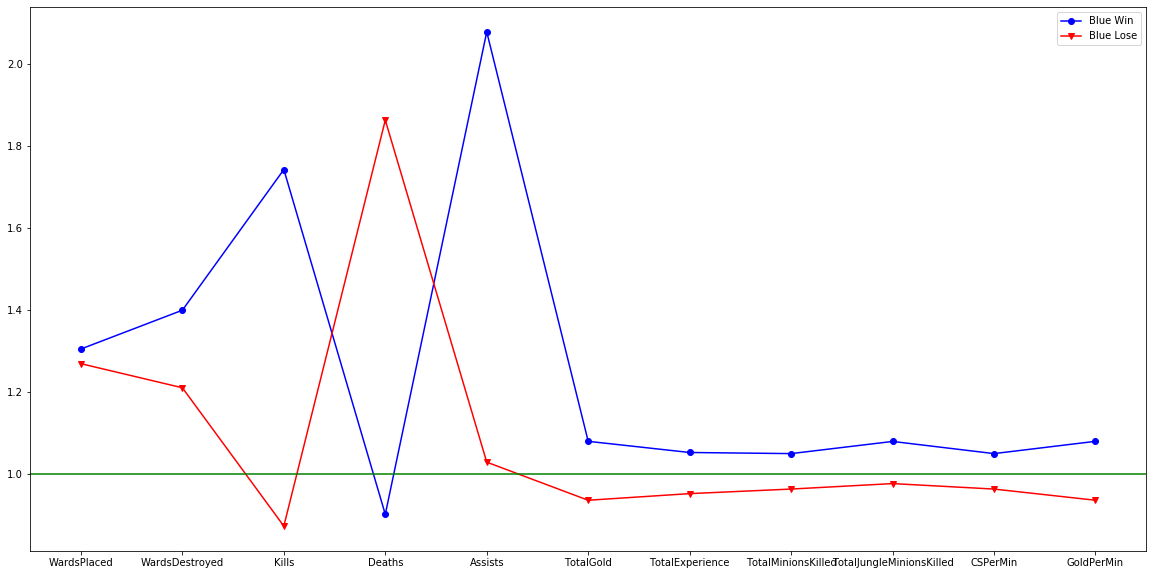

In [8]:
diff_blue_red = pd.DataFrame(data['blueWins'])
diff_blue_red['WardsPlaced'] = data['blueWardsPlaced'] / data['redWardsPlaced']
diff_blue_red['WardsDestroyed'] = data['blueWardsDestroyed'] / data['redWardsDestroyed']
diff_blue_red['Kills'] = data['blueKills'] / data['redKills']
diff_blue_red['Deaths'] = data['blueDeaths'] / data['redDeaths']
diff_blue_red['Assists'] = data['blueAssists'] / data['redAssists']
diff_blue_red['TotalGold'] = data['blueTotalGold'] / data['redTotalGold']
diff_blue_red['TotalExperience'] = data['blueTotalExperience'] / data['redTotalExperience']
diff_blue_red['TotalMinionsKilled'] = data['blueTotalMinionsKilled'] / data['redTotalMinionsKilled']
diff_blue_red['TotalJungleMinionsKilled'] = data['blueTotalJungleMinionsKilled'] / data['redTotalJungleMinionsKilled']
diff_blue_red['CSPerMin'] = data['blueCSPerMin'] / data['redCSPerMin']
diff_blue_red['GoldPerMin'] = data['blueGoldPerMin'] / data['redGoldPerMin']
diff_blue_red = diff_blue_red.replace([np.inf, -np.inf], np.nan)
diff_blue_red = diff_blue_red.dropna()
diff_blue_red

blueWin = diff_blue_red.loc[diff_blue_red['blueWins'] == 1]
blueWin = blueWin.drop('blueWins',axis=1)
blueLose = diff_blue_red.loc[diff_blue_red['blueWins'] == 0]
blueLose = blueLose.drop('blueWins',axis=1)

blueWinAve = blueWin.mean(axis=0)
blueLoseAve = blueLose.mean(axis=0)

plt.figure(figsize = (20,10))
plt.plot(blueWinAve,'bo-',label='Blue Win')
plt.plot(blueLoseAve,'rv-',label='Blue Lose')
plt.axhline(y=1, color='g', linestyle='-')
plt.legend()
plt.show()

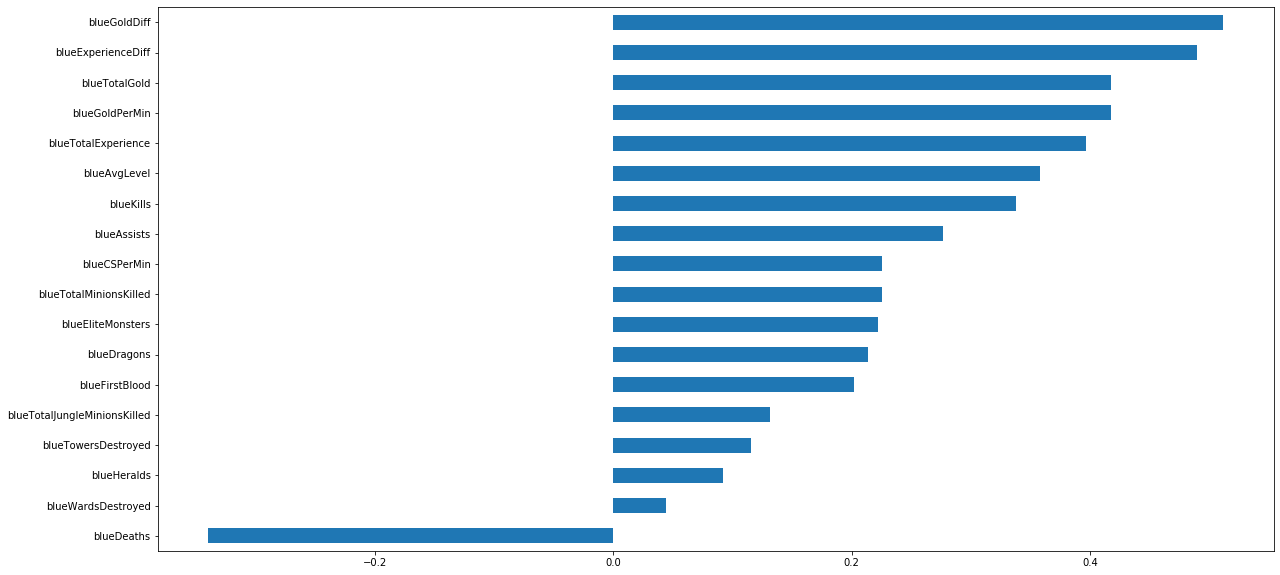

In [9]:
blueWin_cor = data[data.columns[2:20]].apply(lambda x: x.corr(data['blueWins']))
blueWin_cor = blueWin_cor.sort_values()

plt.figure(figsize=(20,10))
blueWin_cor.plot.barh()
plt.show()

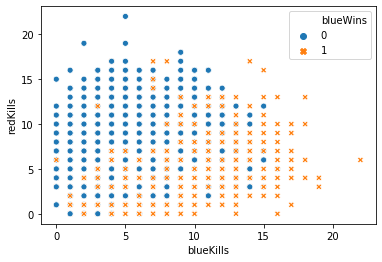

In [10]:
sns.scatterplot(data=data,x='blueKills',y='redKills',hue='blueWins',style='blueWins')

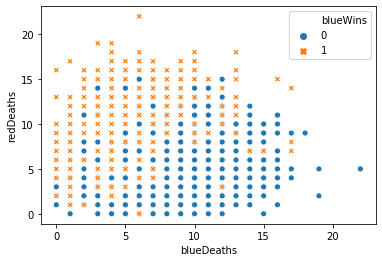

In [11]:
sns.scatterplot(data=data,x='blueDeaths',y='redDeaths',hue='blueWins',style='blueWins')

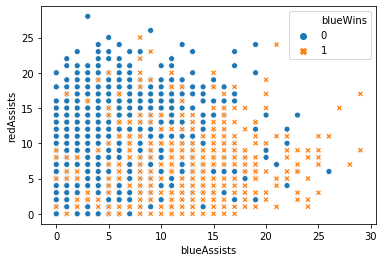

In [12]:
sns.scatterplot(data=data,x='blueAssists',y='redAssists',hue='blueWins',style='blueWins')

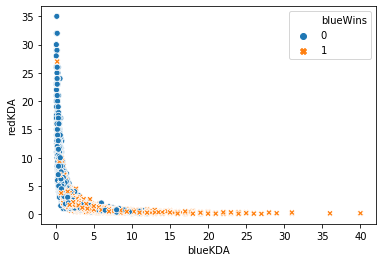

In [13]:
KDA = pd.DataFrame(data['blueWins'])
KDA['blueKDA'] = (data['blueKills'] + data['blueAssists']) / data['blueDeaths']
KDA['redKDA'] = (data['redKills'] + data['redAssists']) / data['redDeaths']


sns.scatterplot(data=KDA,x='blueKDA',y='redKDA',hue='blueWins',style='blueWins')

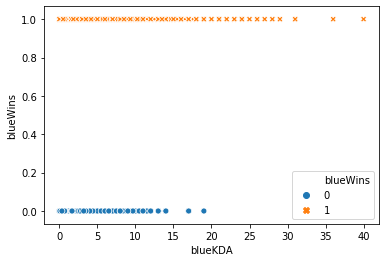

In [14]:
inBlueKDA = KDA[['blueKDA','blueWins']]
inBlueKDA['blueKDADiff'] = KDA['blueKDA'] - KDA['redKDA']
sns.scatterplot(data=inBlueKDA,x='blueKDA',y='blueWins',hue='blueWins',style='blueWins')

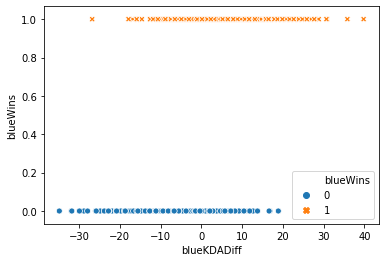

In [15]:
sns.scatterplot(data=inBlueKDA,x='blueKDADiff',y='blueWins',hue='blueWins',style='blueWins')

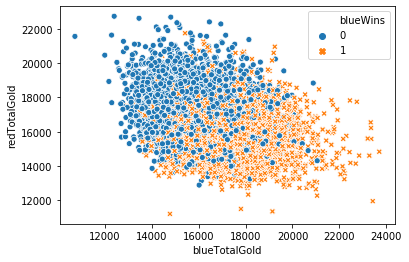

In [16]:
sns.scatterplot(data=data,x='blueTotalGold',y='redTotalGold',hue='blueWins',style='blueWins')

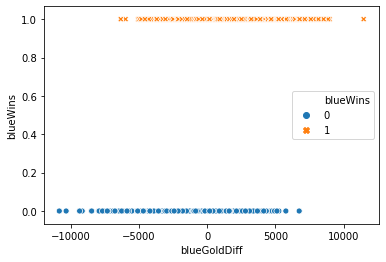

In [17]:
sns.scatterplot(data=data,x='blueGoldDiff',y='blueWins',hue='blueWins',style='blueWins')

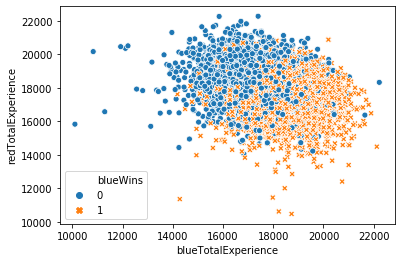

In [18]:
sns.scatterplot(data=data,x='blueTotalExperience',y='redTotalExperience',hue='blueWins',style='blueWins')

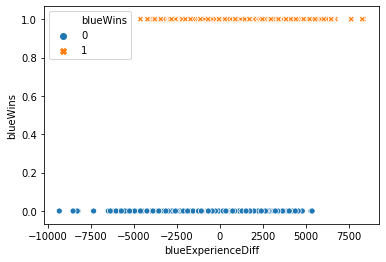

In [19]:
sns.scatterplot(data=data,x='blueExperienceDiff',y='blueWins',hue='blueWins',style='blueWins')

In [20]:
data['blueKDA'] = KDA['blueKDA'].round(1)
data['redKDA'] = KDA['redKDA'].round(1)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueKDA,redKDA
0,0,28,2,1,9,6,11,0,0,0,...,6.8,17047,197,55,-643,8,19.7,1656.7,3.3,1.6
1,0,12,1,0,5,5,5,0,0,0,...,6.8,17438,240,52,2908,1173,24.0,1762.0,2.0,1.4
2,0,15,0,0,7,11,4,1,1,0,...,6.8,17254,203,28,1172,1033,20.3,1728.5,1.0,3.6
3,0,43,1,0,4,5,5,1,0,1,...,7.0,17961,235,47,1321,7,23.5,1647.8,1.8,3.8
4,0,75,4,0,6,6,6,0,0,0,...,7.0,18313,225,67,1004,-230,22.5,1740.4,2.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,6.8,16498,229,34,-2519,-2469,22.9,1524.6,3.0,1.6
9875,1,54,0,0,6,4,8,1,1,0,...,7.0,18367,206,56,-782,-888,20.6,1545.6,3.5,1.2
9876,0,23,1,0,6,7,5,0,0,0,...,7.4,19909,261,60,2416,1877,26.1,1831.9,1.6,3.0
9877,0,14,4,1,2,3,3,1,1,0,...,7.2,18314,247,40,839,1085,24.7,1529.8,1.7,2.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sample = data.drop('blueWins',axis=1)
label = data['blueWins']
sample_train, sample_test, label_train, label_test = train_test_split(sample, label, test_size=0.1)

In [22]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=0.01)
LRmodel.fit(sample_train,label_train)
pred_LR = LRmodel.predict(sample_test)
acc_LR = accuracy_score(pred_LR, label_test)

print('Logistic Regression Prediction Accuracy: ' + str(acc_LR))


Logistic Regression Prediction Accuracy: 0.7353846153846154


In [23]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(criterion='entropy',max_depth=5)
DTmodel.fit(sample_train,label_train)
pred_DT = DTmodel.predict(sample_test)
acc_DT = accuracy_score(pred_DT,label_test)

print('Decision Tree Classifier Prediction Accuracy: ' + str(acc_DT))

Decision Tree Classifier Prediction Accuracy: 0.7138461538461538


In [24]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(max_depth=6)
RFmodel.fit(sample_train,label_train)
pred_RF = RFmodel.predict(sample_test)
acc_RF = accuracy_score(pred_RF,label_test)

print('Random Forest Classifier Prediction Accuracy: ' + str(acc_RF))

Random Forest Classifier Prediction Accuracy: 0.7230769230769231


In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=35)
KNNmodel.fit(sample_train,label_train)
pred_KNN = KNNmodel.predict(sample_test)
acc_KNN = accuracy_score(pred_KNN,label_test)

print('KNN Classifier Prediction Accuracy: ' + str(acc_KNN))

KNN Classifier Prediction Accuracy: 0.7220512820512821


In [26]:
from sklearn.ensemble import AdaBoostClassifier
ABmodel = AdaBoostClassifier(n_estimators=40)
ABmodel.fit(sample_train,label_train)
pred_AB = ABmodel.predict(sample_test)
acc_AB = accuracy_score(pred_AB,label_test)

print('Ada Boost Classifier Prediction Accuracy: ' + str(acc_AB))

Ada Boost Classifier Prediction Accuracy: 0.7220512820512821
